# Problem Statement
Predicting the chances of graduate admissions from an Indian perspective

# Analysis Questions
1. What is the distribution of GRE scores among the applicants?
2. How does the TOEFL score correlate with the CGPA of the applicants?
3. What is the distribution of the University Ratings in the dataset?
4. Is there a relationship between the Statement of Purpose (SOP) and Letter of Recommendation (LOR) ratings?
6. Which features are most correlated with the chance of admission?


# Importing Libraries

In [76]:
import warnings #filter warnings

import pandas as pd #data exploration and manipulation
import matplotlib.pyplot as plt #visualization
import numpy as np #linear algebra and additional mathemetics
import seaborn as sns #visualization
from flask import Flask, request, jsonify #pickling the model

#Machine learning
#preprocessing(label encoding)
from sklearn.preprocessing import (LabelEncoder, StandardScaler)
#splitting datasets
from sklearn.model_selection import (train_test_split, cross_val_predict, GridSearchCV, RandomizedSearchCV, BaseCrossValidator)
#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Loading and preview of the dataset

In [11]:
admissions = pd.read_csv("/content/drive/MyDrive/Datasets/Admission_Predict.csv")
admissions.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Data Exploration

In [15]:
admissions.shape

(400, 9)

The dataset has 400 rows and 9 columns

In [16]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [19]:
admissions.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# Cleaning

In [35]:
missing_values = admissions.isnull().sum()
print(missing_values)

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [25]:
admissions.duplicated().sum()

0

In [31]:
admissions.rename(columns={' TOEFL': 'TOEFL'}, inplace=True)


# Exploratory Data Analysis

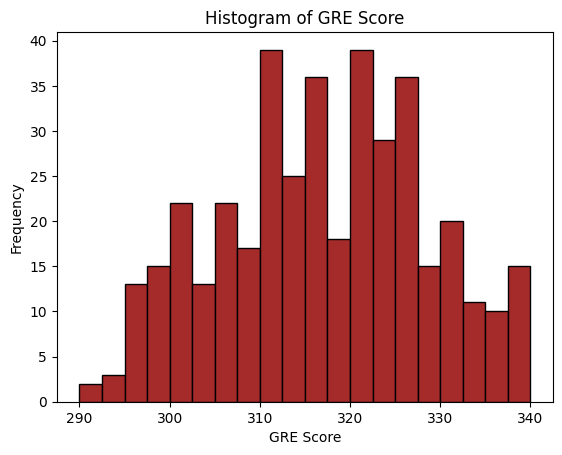

In [46]:
plt.hist(admissions['GRE Score'], bins=20, color='brown', edgecolor='black')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.title('Histogram of GRE Score')

#show
plt.show()

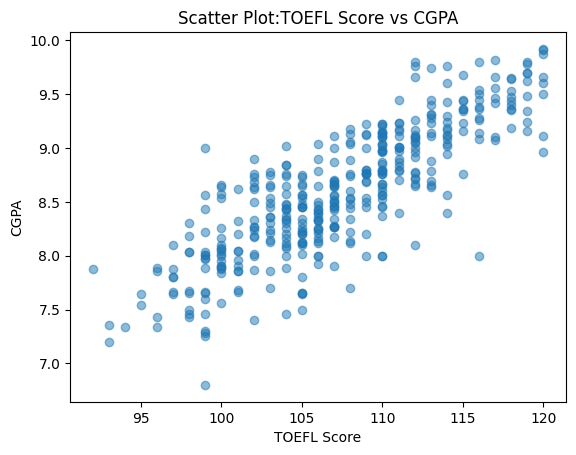

In [36]:
plt.scatter(admissions['TOEFL Score'], admissions['CGPA'], alpha=0.5)
plt.xlabel('TOEFL Score')
plt.ylabel('CGPA')
plt.title('Scatter Plot:TOEFL Score vs CGPA')

# Show the scatter plot
plt.show()

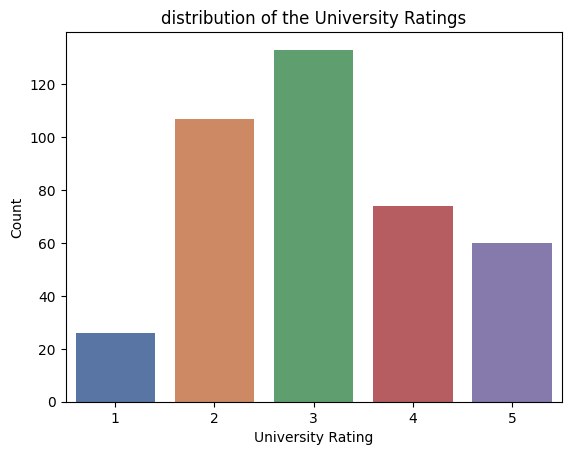

In [45]:
sns.countplot(x='University Rating', data=admissions, palette='deep')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.title('distribution of the University Ratings')

#Show the bar plot
plt.show()

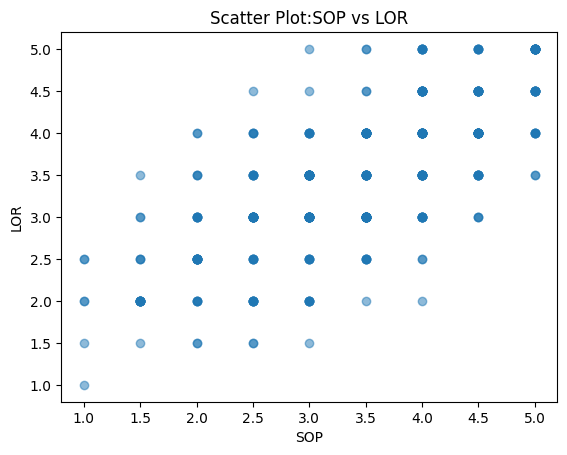

In [41]:
plt.scatter(admissions['SOP'], admissions['LOR '], alpha=0.5)
plt.xlabel('SOP')
plt.ylabel('LOR')
plt.title('Scatter Plot:SOP vs LOR')

# Show the scatter plot
plt.show()

In [42]:
corr = admissions.corr()

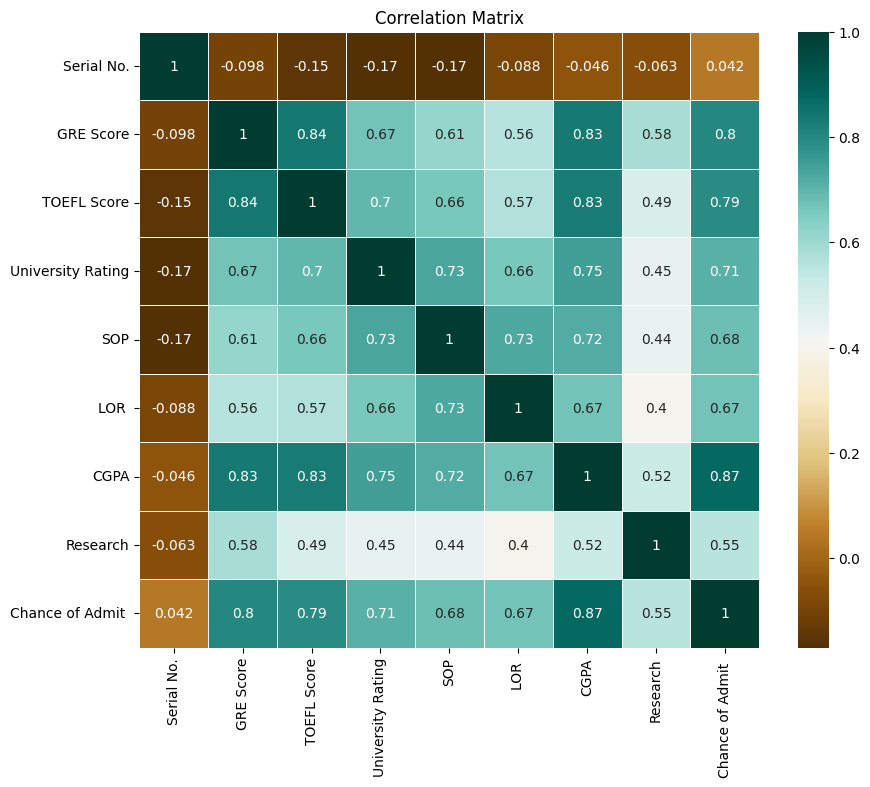

In [47]:
# plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='BrBG', linewidths=0.5)
plt.title('Correlation Matrix')

#show the correlation matrix
plt.show()

# Modelling
## Modelling Steps
1. Data Preprocessing
2. Model selection and training
3. Prediction from model
4. Model Evaluation

In [66]:
# Converting 'Chance of Admit' to binary labels
admissions['Admitted'] = (admissions['Chance of Admit '] > 0.5).astype(int)

In [74]:
# separating indpendent and dependent variables
X = admissions.drop(['Chance of Admit ', 'Admitted'], axis=1)
y = admissions['Admitted']
X.shape, y.shape

((400, 8), (400,))

In [71]:
# split the train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
# instantiating the model
model = LogisticRegression()

In [73]:
# fitting the model on the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
#  Predictions on the test set
y_predict = model.predict(X_test)

In [78]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_predict)
conf_matrix = confusion_matrix(y_test, y_predict)
classification_rep = classification_report(y_test, y_predict)

In [79]:
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.85
Confusion Matrix:
[[ 0 10]
 [ 2 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.87      0.97      0.92        70

    accuracy                           0.85        80
   macro avg       0.44      0.49      0.46        80
weighted avg       0.76      0.85      0.80        80

